## Purpose: Nonlinear fit

Demonstration: 
    1. Gauss Model
    2. LevenbergMarquardtFitter
    3. Compound Model (Gaussian + polynomial)
    4. Compound Model (Gaussian + polynomial + sine)
    5. Evidence calculation (Laplace method)

Author: Do Kester


import stuff

In [26]:
import numpy as numpy
import math

from GaussModel import GaussModel
from PolynomialModel import PolynomialModel
from SineModel import SineModel
from LevenbergMarquardtFitter import LevenbergMarquardtFitter
from Formatter import formatter as fmt
from FitPlot import plotFit
import matplotlib.pyplot as plt

define some constants

In [38]:
# define some constants
N = 201
x0 = 0.7                        # x position of gaussian
a0 = 10.0                       # amplitude of gaussian
s0 = 0.4                        # width
b0 = 1.0                        # offset of background
b1 = 0.2                        # slope of background
c0 = 1.4
c1 = 8.0
c2 = 0.0
sig = 0.2

make a Gauss plus background plus sinusoid

In [39]:
x = numpy.linspace( -2.0, 2.0, N, dtype=float )
x2 = ( x - x0 ) / s0
x2 *= x2
ym = a0 * numpy.exp( -0.5 * x2 )             # gauss
ym += b0 + b1 * x                            # linear part
ym += c0 * numpy.sin( c1 * x + c2 )          # sinus

y = ym + sig * numpy.random.randn( N )


Define the model

In [40]:
mdl = GaussModel( )
print( mdl )


Gauss: f( x:p ) = p_0 * exp( -0.5 * ( ( x - p_1 ) / p_2 )^2 )


define the fitter: Fitter

In [41]:
fitter = LevenbergMarquardtFitter( x, mdl )
 
# find the parameters
param = fitter.fit( y )

  

In [42]:
print( "Parameters :", fmt( param ) )
print( "StDevs     :", fmt( fitter.stdevs ) )
print( "Chisq      :", fmt( fitter.chisq ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-100,100] ) ) )
print( "Covar matrix :" )
print( fmt( fitter.covariance))

Parameters : [   10.702    0.712    0.478]
StDevs     : [    0.220    0.011    0.011]
Chisq      :   271.056
Scale      :     1.170
Evidence   :  -149.619
Covar matrix :
[[    0.049   -0.000   -0.001]
 [   -0.000    0.000    0.000]
 [   -0.001    0.000    0.000]]


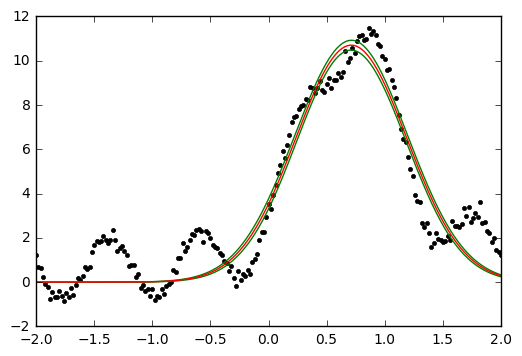

In [43]:
plotFit( x, y, mdl, ftr=fitter )

Adding a linear background yields a better fit.

In [44]:
mdl = GaussModel()
mdl += PolynomialModel( 1 )
fitter = LevenbergMarquardtFitter( x, mdl )
param = fitter.fit( y )


Parameters : [    9.751    0.693    0.396    1.081    0.399]
StDevs     : [    0.236    0.010    0.013    0.119    0.083]
Chisq      :   197.550
Scale      :     1.004
Evidence   :  -139.499


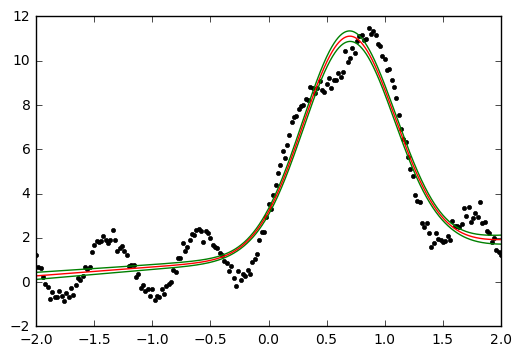

In [45]:
print( "Parameters :", fmt( param ) )
print( "StDevs     :", fmt( fitter.stdevs ) )
print( "Chisq      :", fmt( fitter.chisq ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-100,100] ) ) )
plotFit( x, y, mdl, ftr=fitter )

Adding a sine to the model yields a still better fit. The evidence increases further.

In [46]:
mdl = GaussModel()
mdl += PolynomialModel( 1 )
mdl += SineModel()
fitter = LevenbergMarquardtFitter( x, mdl )
param = fitter.fit( y )

Parameters : [   10.014    0.698    0.400    0.994    0.224    1.270    0.009    1.405]
StDevs     : [    0.049    0.002    0.003    0.025    0.018    0.002    0.021    0.021]
Chisq      :     8.368
Scale      :     0.208
Evidence   :  -108.154


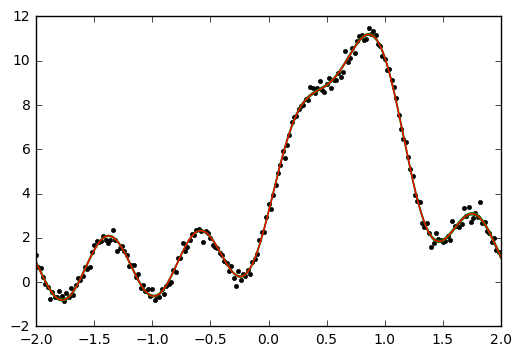

In [49]:
print( "Parameters :", fmt( param, max=None ) )
print( "StDevs     :", fmt( fitter.stdevs, max=None ) )
print( "Chisq      :", fmt( fitter.chisq ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-100,100] ) ) )
plotFit( x, y, mdl, ftr=fitter )

Upto now we assumed in the evidence calcultaion that the (noise)scale is 1.0. we calculate that the scale = 0.208. When we take that along in the evidence calculation by adding noiseLimits we get again a higher evidence.

In [50]:
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-100,100], noiseLimits=[0.01,10] ) ) )


Evidence   :   -19.170
